## Lending Club Case Study - EDA

#### Problem Statement and Business Understanding:

1. Given is the sample data from a consumer finance company which specialises in lending various types of loans to urban customers
2. Purpose is to apply EDA concepts on the data about past loan applicants and whether they ‘defaulted’ or not
3. Goal is to analyze how consumer attributes and loan attributes influence the tendency of a customer to default using Exploratory Data Analysis(EDA)
4. And to identify patterns and draw insights from the analysis that the business can utilize

In [2]:
# Import all necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

##### Data loading and Understanding

In [4]:
loan_df = pd.read_csv("C:/Users/Success/Desktop/Jayanth/EDA-Lending Club Case Study/loan.csv")

In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
loan_df.shape

(39717, 111)

#### Data Cleaning

In [8]:
# Finding columns that have all null values

loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# Finding rows and columns with all missing values

print("Empty rows :")
print(loan_df.isnull().all(axis=1).sum())

print("Empty Columns :")
print(loan_df.isnull().all(axis=0).sum())

Empty rows :
0
Empty Columns :
54


In [12]:
# Dropping columns that have only null values

loan_df = loan_df.dropna(axis=1, how='all')

In [13]:
print("Empty Columns after dropping :")
print(loan_df.isnull().all(axis=0).sum())

Empty Columns after dropping :
0


In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
loan_df.shape

(39717, 57)

In [17]:
# Dropping columns that have 75% or more null values

loan_df = loan_df.dropna(axis=1, how='all', thresh=loan_df.shape[0]*0.75)

In [18]:
loan_df.shape

(39717, 53)

In [21]:
# Dropping columns that have 50% or more null values

loan_df = loan_df.dropna(axis=1, how='all', thresh=loan_df.shape[0]*0.5)

In [22]:
loan_df.shape

(39717, 53)

In [23]:
loan_df.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B  

In [24]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [25]:
# Handling columns that need to fill null values

loan_df["pub_rec_bankruptcies"].fillna("Unknown", inplace=True)
loan_df["emp_length"].fillna('0', inplace=True)
loan_df["tax_liens"].fillna("Unknown", inplace=True)
loan_df["chargeoff_within_12_mths"].fillna("Unknown", inplace=True)

In [26]:
# Removing special characters from numerical columns

loan_df["emp_length"] = loan_df["emp_length"].str.extract('(\d+)')
loan_df["term"] = loan_df["term"].str.replace(' months', '')
loan_df["int_rate"] = loan_df["int_rate"].str.replace('%', '')
loan_df["revol_util"] = loan_df["revol_util"].str.replace('%', '')

In [27]:
loan_df["emp_length"]

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [28]:
loan_df["term"]

0         36
1         60
2         36
3         36
4         60
        ... 
39712     36
39713     36
39714     36
39715     36
39716     36
Name: term, Length: 39717, dtype: object

In [29]:
loan_df["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [30]:
loan_df["revol_util"]

0        83.70
1         9.40
2        98.50
3           21
4        53.90
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: object

In [31]:
# Converting numerical columns from type object to numeric

numeric_columns = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "term", "installment", "int_rate", "annual_inc", "revol_util", "total_pymnt", "total_pymnt_inv" ,"dti"]
loan_df[numeric_columns] = loan_df[numeric_columns].apply(pd.to_numeric) 

In [32]:
loan_df["loan_amnt"]

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 39717, dtype: int64

In [33]:
loan_df["funded_amnt"]

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 39717, dtype: int64

In [34]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Deriving metrices for further analysis

In [35]:
# Deriving month and year columns from the date column

loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"], format='%b-%y')
loan_df["issue_month"] = loan_df["issue_d"].dt.month
loan_df["issue_year"] = loan_df["issue_d"].dt.year

In [36]:
loan_df.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011


In [37]:
# Deriving metrices from date column and dropping the date column

loan_df["last_pymnt_d"] = pd.to_datetime(loan_df["last_pymnt_d"], format='%b-%y')
loan_df["last_pymnt_month"] = loan_df["issue_d"].dt.month
loan_df["last_pymnt_year"] = loan_df["issue_d"].dt.year

loan_df.drop("last_pymnt_d", inplace=True, axis=1)
loan_df.drop("issue_d", inplace=True, axis=1)

In [41]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_month,issue_year,last_pymnt_month,last_pymnt_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,12,2011


In [42]:
loan_df.shape

(39717, 56)

### Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

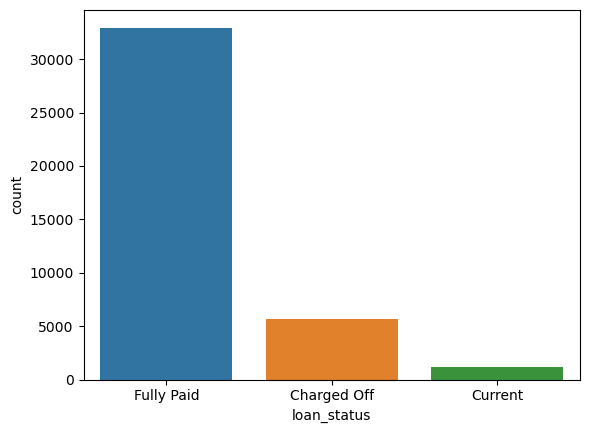

In [44]:
# Analysing the categorical variable - loan status

sns.countplot(loan_df["loan_status"])

###### Observation

From the above plot we can see that nearly 5000 of the loan statuses are "Charged Off" which means a considerable amount of the customers or borrowers have defaulted on the loan 

<AxesSubplot:xlabel='purpose', ylabel='count'>

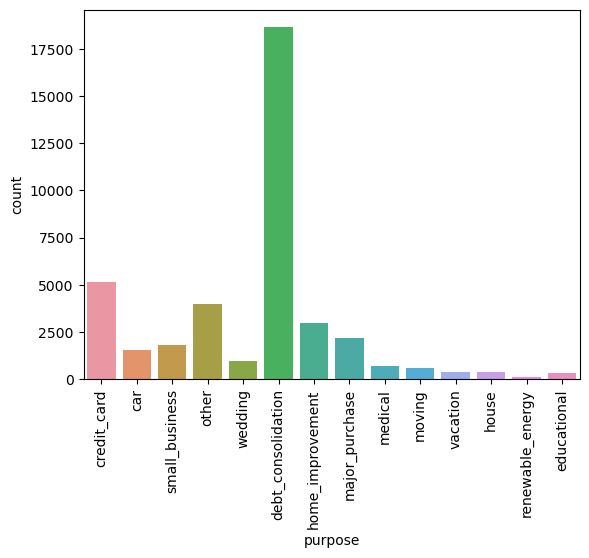

In [49]:
# Analysing the categorical variable - purpose

plt.xticks(rotation=90)
sns.countplot(loan_df["purpose"])

###### Observation

From above plot we can see that the purpose of loan is mostly "debt_consolidation" which might indicate most customers or borrowers have taken a loan due to debt consolidation

In [50]:
# Analysing the continuous numerical column - loan amount

loan_df["loan_amnt"].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

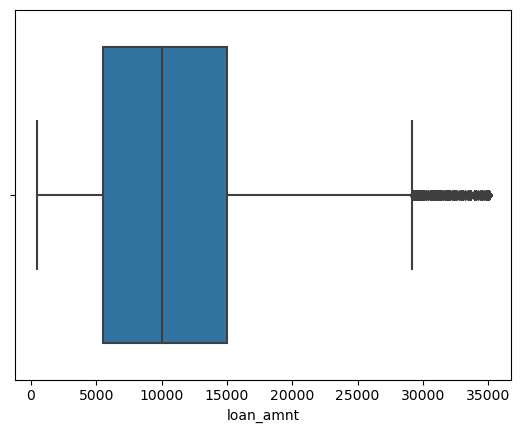

In [51]:
sns.boxplot(loan_df["loan_amnt"])

##### Observation

The above box plot shows the distribution of loan amounts from which we can that most commonly the loan amount fall between 5000 and 15000

<AxesSubplot:xlabel='grade', ylabel='count'>

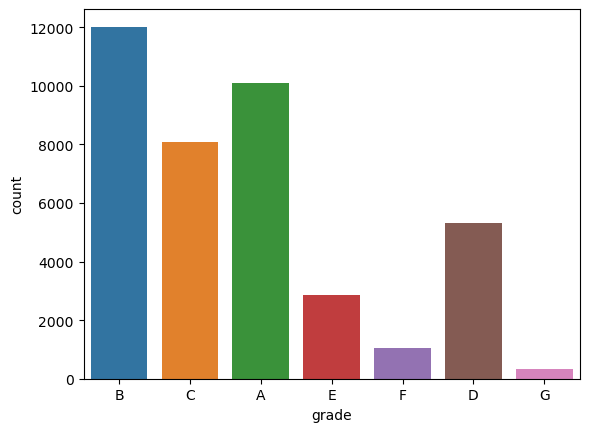

In [54]:
# Analysing the categorical variable - grade

sns.countplot(loan_df["grade"])

##### Observation

From above plot we can see that most of the loans are grade A and B.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

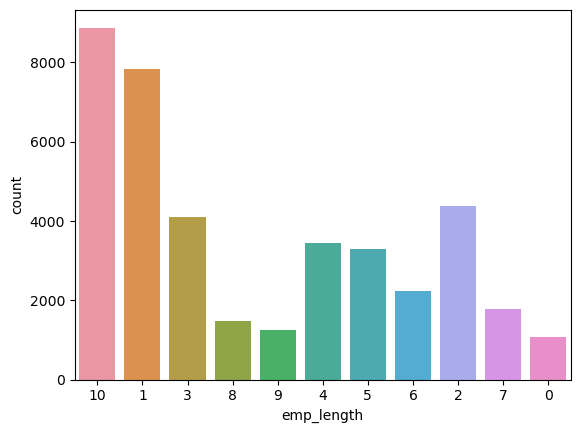

In [55]:
# Analysing the numerical categorical variable - Employment Length

sns.countplot(loan_df["emp_length"])

##### Observation

From above plot we have infer that majority of borrowers are employees having more than 10 years of experience and next highest number of borrowers and employees who have started their employment with 1 year of experience

In [63]:
# Analysing the continuous numerical column - annual income
loan_df["annual_inc"] = loan_df["annual_inc"].astype("int64")
loan_df["annual_inc"].describe()

count    3.971700e+04
mean     6.896892e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

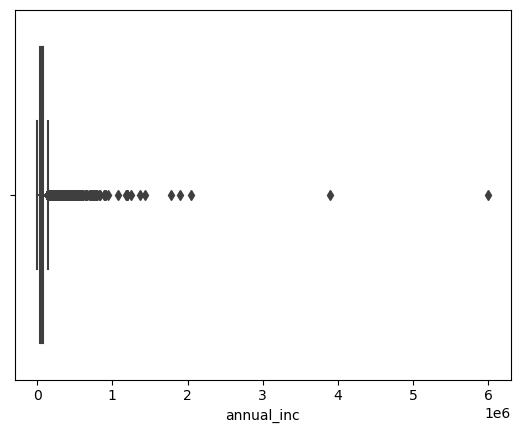

In [64]:
sns.boxplot(loan_df["annual_inc"])

##### Observation

From the description of the column and the box plot we can see there are outliers indicating that only two borrowers have an annual income more that 30 Lakhs

In [66]:
# Removing outliers from the Annual Income Column

loan_df = loan_df[loan_df["annual_inc"] < loan_df["annual_inc"].quantile(0.99)] 

<AxesSubplot:xlabel='annual_inc'>

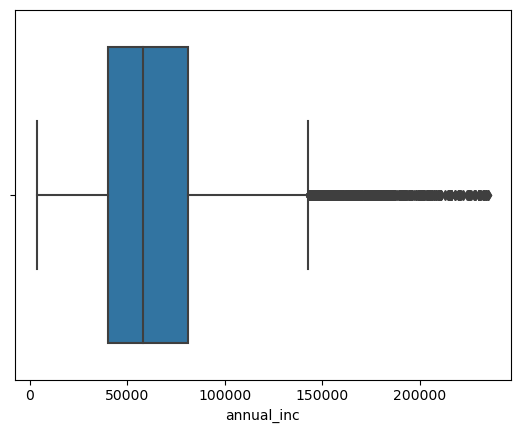

In [68]:
# After removing outliers

sns.boxplot(loan_df["annual_inc"])

<AxesSubplot:xlabel='int_rate'>

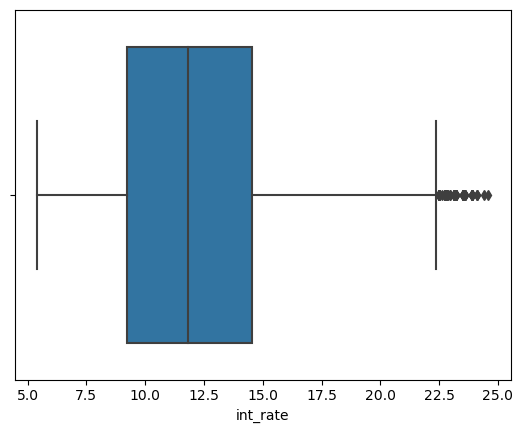

In [69]:
# Analysis on the numerical variable - Interest Rate

sns.boxplot(loan_df['int_rate'])

##### Observation

From above boxplot we can infer that most borrowers have an interest rate ranging between 9.0 and 15.0

### Segmented Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

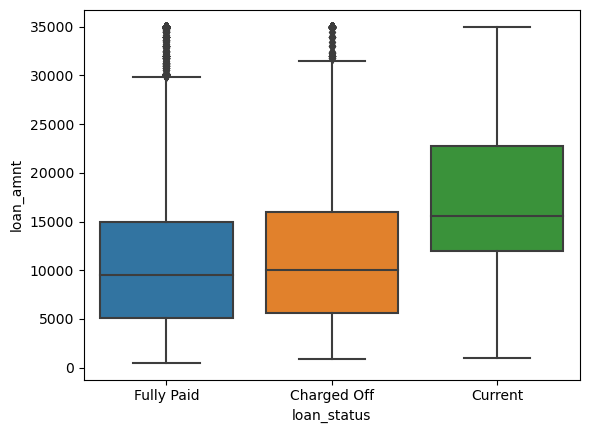

In [70]:
# Analysing Loan Amount for each Loan status

sns.boxplot(x="loan_status", y="loan_amnt", data=loan_df)

##### Observation

The 25th, 50th and 75th percentile in loan amounts for both charged off and fully paid loans are similar 

<AxesSubplot:xlabel='term', ylabel='count'>

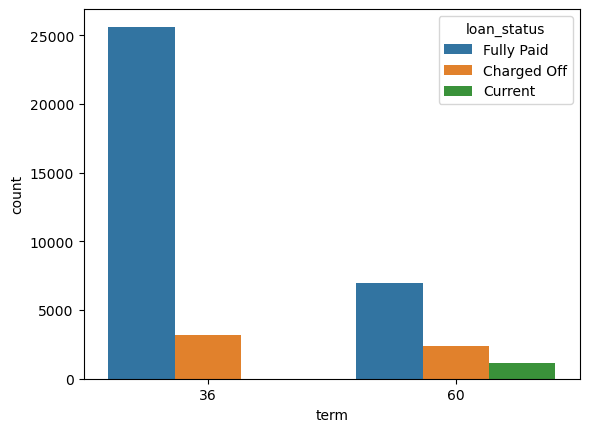

In [73]:
# Analysing the Loan Term for each Loan Status

sns.countplot(x="term", hue="loan_status", data=loan_df)

##### Observation

From the above plot we can infer that if the loan term is 36 or 60 there is a higher chance that the loan is charge off hence be defaulter 

<AxesSubplot:xlabel='purpose', ylabel='count'>

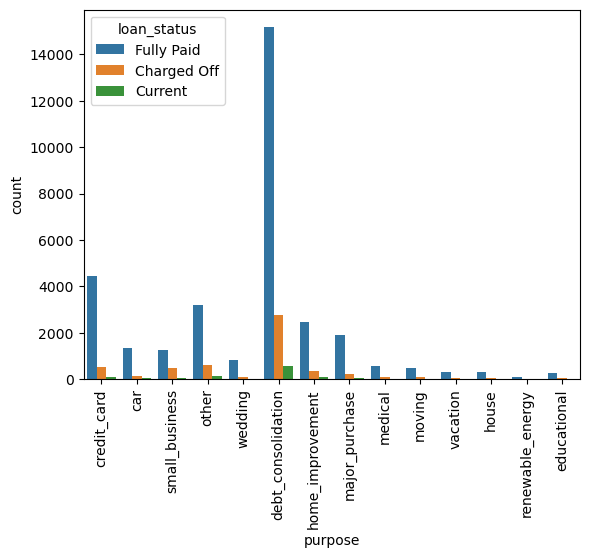

In [75]:
# Analysing the Loan Purpose for each Loan Status

plt.xticks(rotation=90)
sns.countplot(x="purpose", hue="loan_status", data=loan_df)

##### Observation

From above plot we can infer that majority of the borrowers have a loan for debt consolidation 

### Bivariate Analysis

In [78]:
# Removing columns that will be necessary for analysis

columns_to_be_removed = ["collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "delinq_amnt"]
loan_df.drop(columns_to_be_removed, inplace=True, axis=1)

<AxesSubplot:>

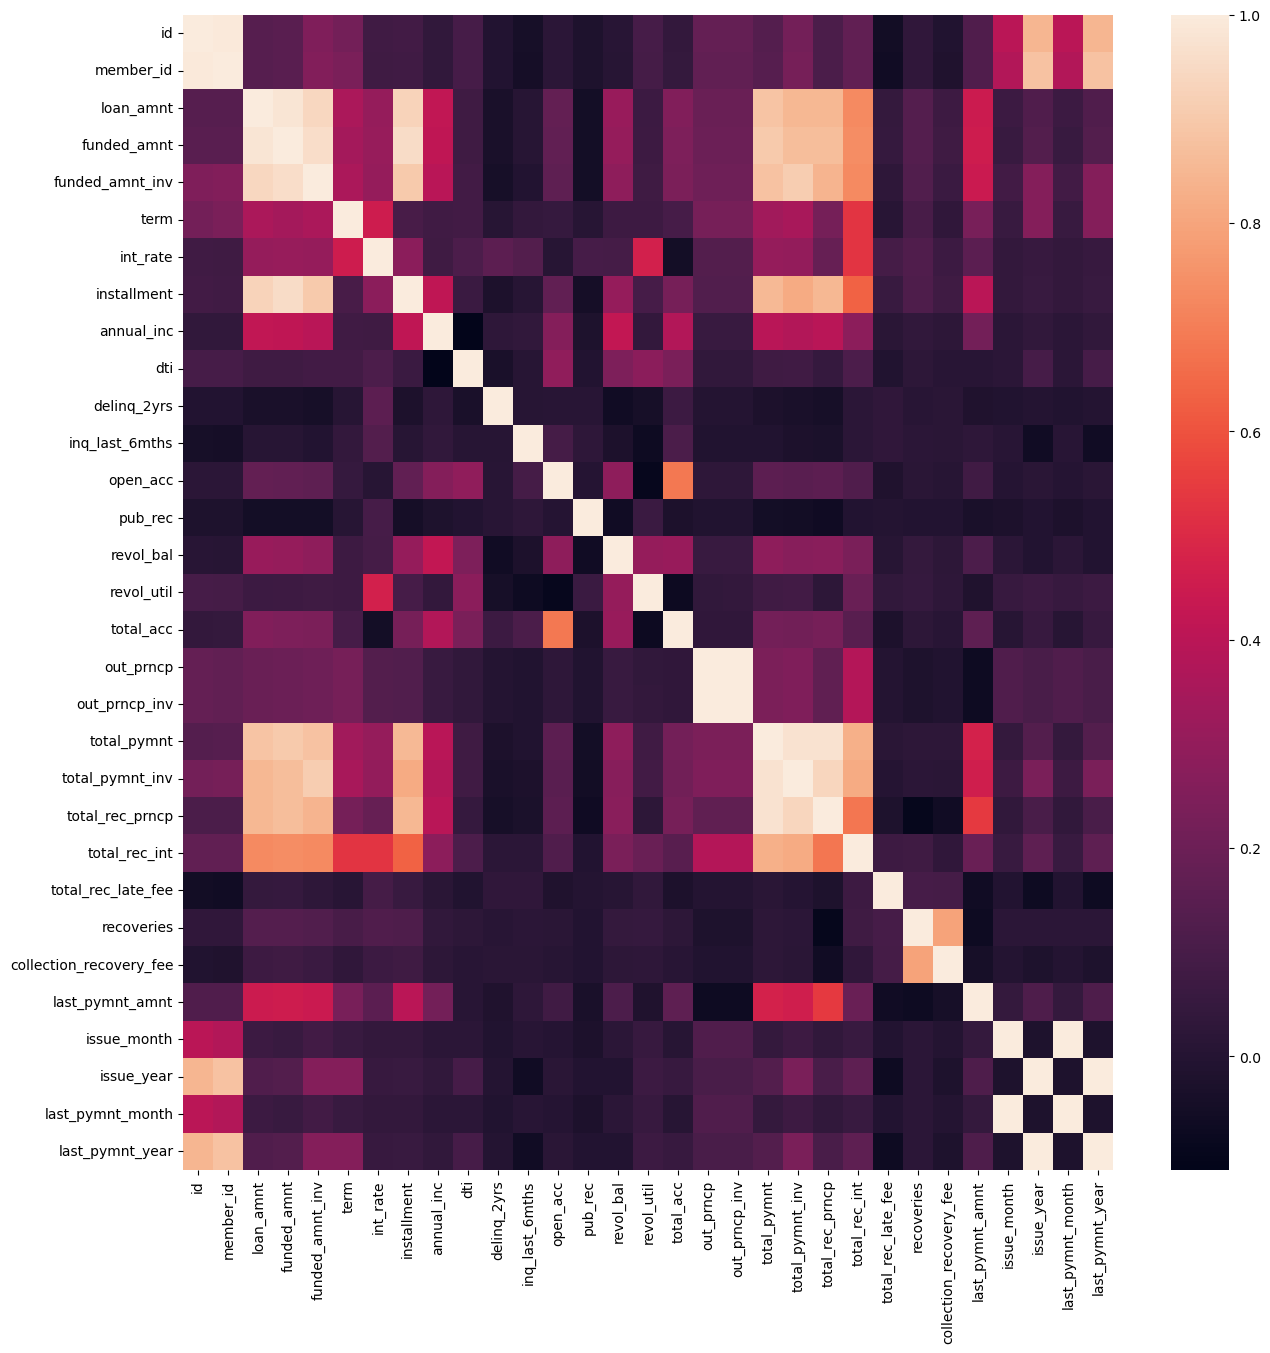

In [82]:
# Plotting a heatmap to see the correlations between the variables

plt.figure(figsize=(15,15))
sns.heatmap(loan_df.corr())

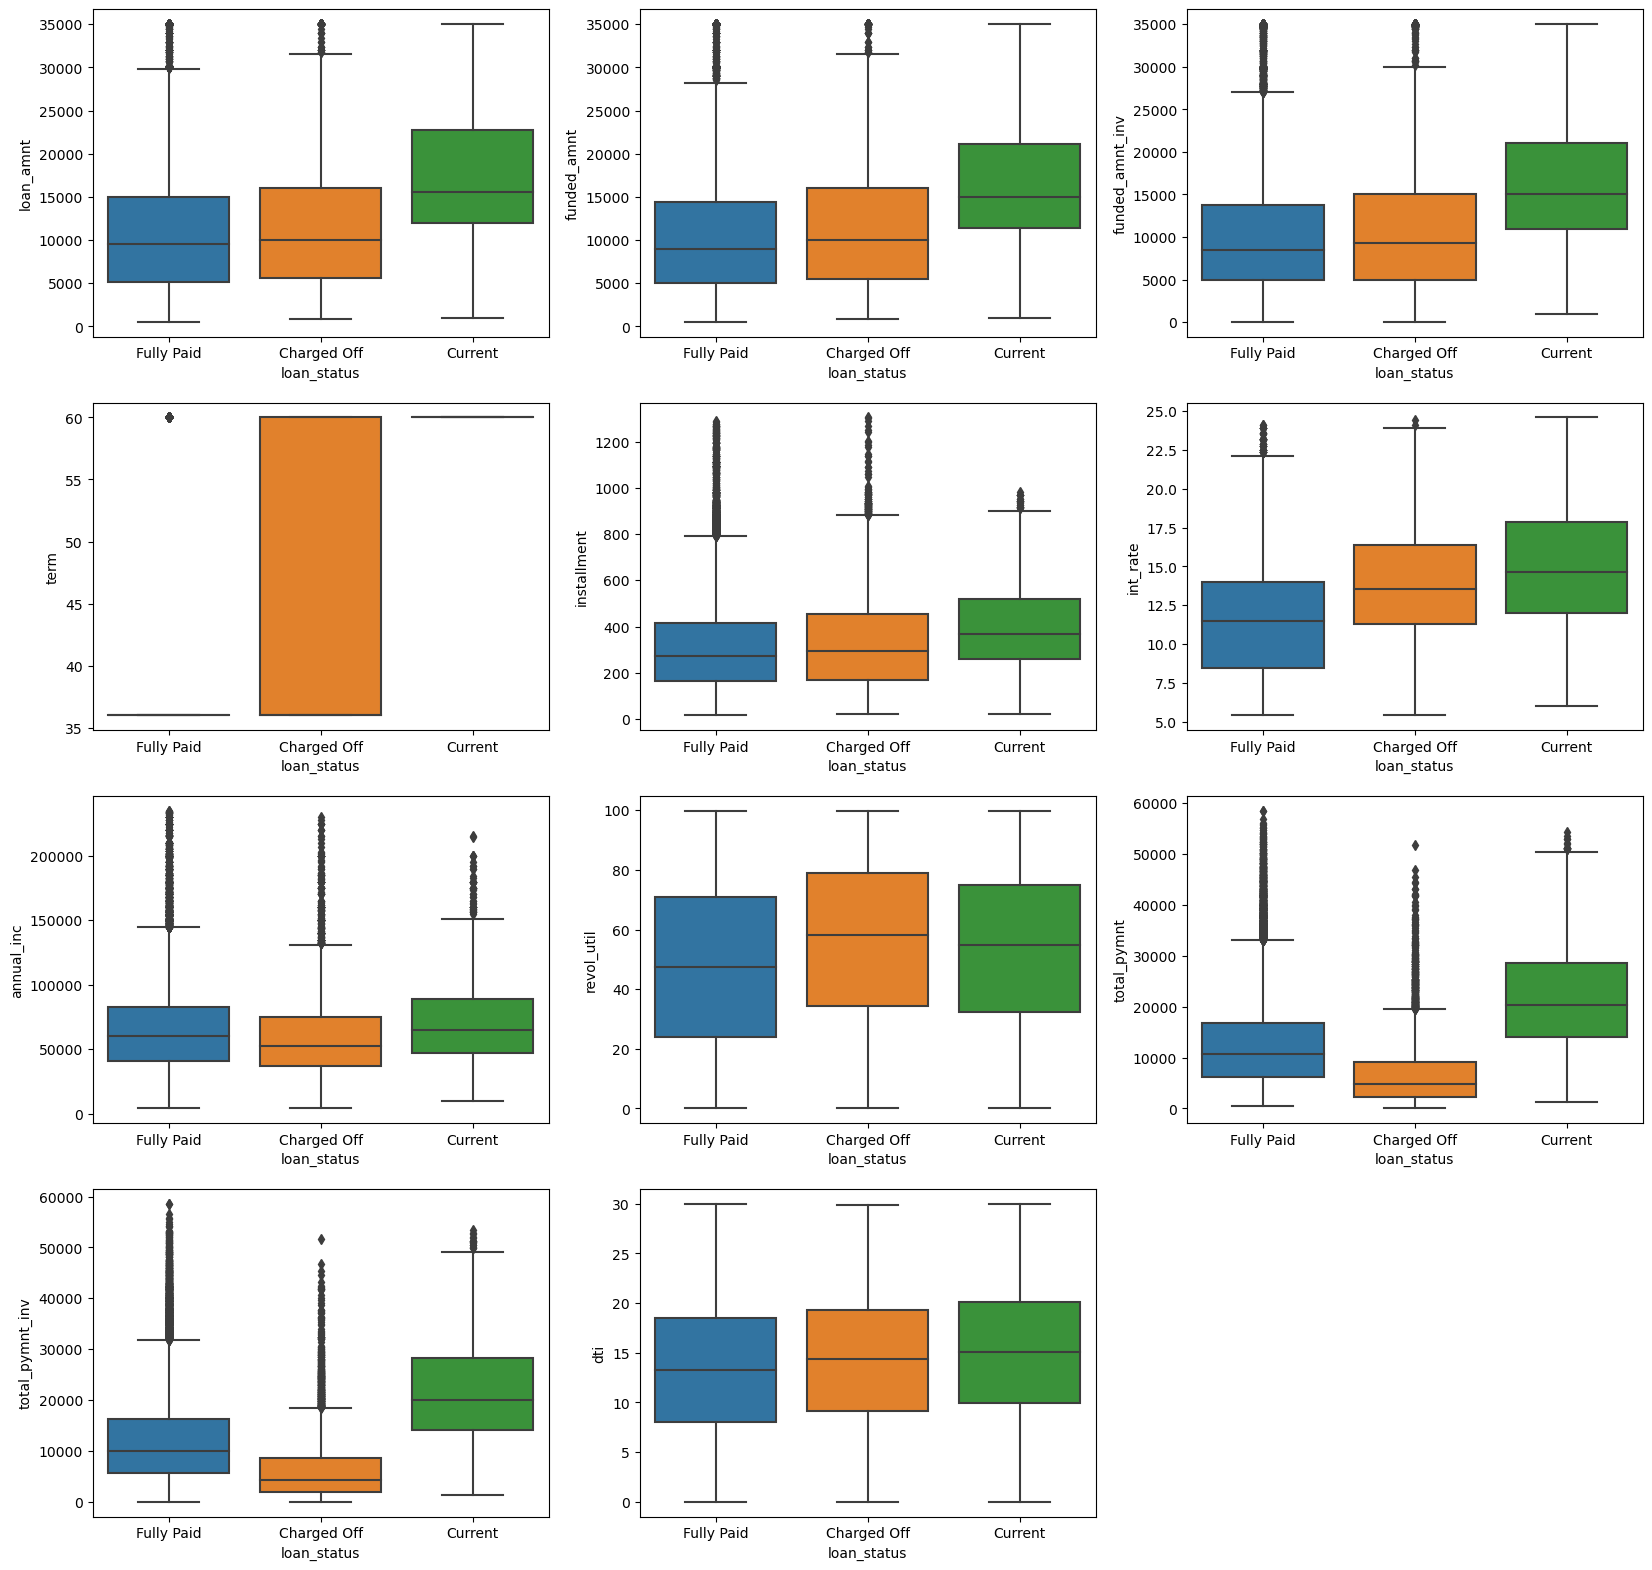

In [87]:
# Analysing the categorical variable - Loan status against the numerical variables

plt.figure(figsize=(20,40))

for index in range(len(numeric_columns)):
    plt.subplot(8,3, index+1)
    sns.boxplot(x="loan_status", y=numeric_columns[index], data=loan_df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

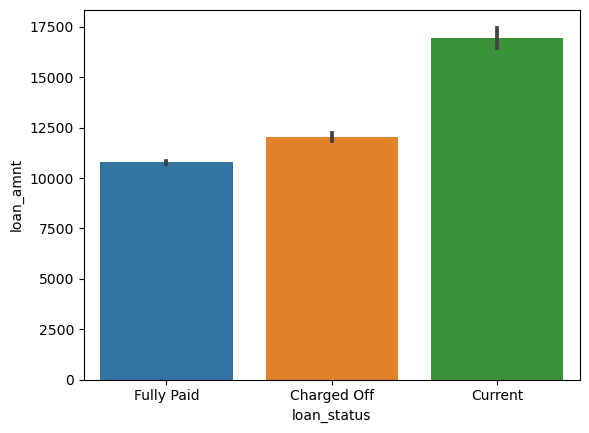

In [90]:
# Analysing Loan amount against Loan Status

sns.barplot(x="loan_status", y="loan_amnt", data=loan_df)

##### Observation
From above plot we see that increased loan amount does not affect loan status

#### Deriving metrices for bivariate analysis

In [94]:
# Categorizing the Loan amount into bucket of 7000s

loan_df["loan_amnt_categories"] = pd.cut(loan_df["loan_amnt"], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000+'])

In [95]:
# Categorizing the Annual income into bucket of 20000s

loan_df["annual_inc_categories"] = pd.cut(loan_df["annual_inc"], [0, 20000, 40000, 60000, 80000, 1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

In [96]:
# Categorizing the Interest rate into buckets of 5

loan_df["int_rate_categories"] = pd.cut(loan_df["int_rate"], [0, 5, 10, 15, 20], labels=['0-5', '5-10', '10-15', '15+'])

In [106]:
# Analysing Annual Income categories against Chargeoff Likeliness

annual_inc_against_chargeoff = loan_df.groupby(['annual_inc_categories', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
annual_inc_against_chargeoff["Total"] = annual_inc_against_chargeoff["Fully Paid"] + annual_inc_against_chargeoff["Charged Off"] + annual_inc_against_chargeoff["Current"]
annual_inc_against_chargeoff["Chargeoff_Likeliness"] = annual_inc_against_chargeoff["Charged Off"] / annual_inc_against_chargeoff["Total"]

<AxesSubplot:xlabel='annual_inc_categories', ylabel='Chargeoff_Likeliness'>

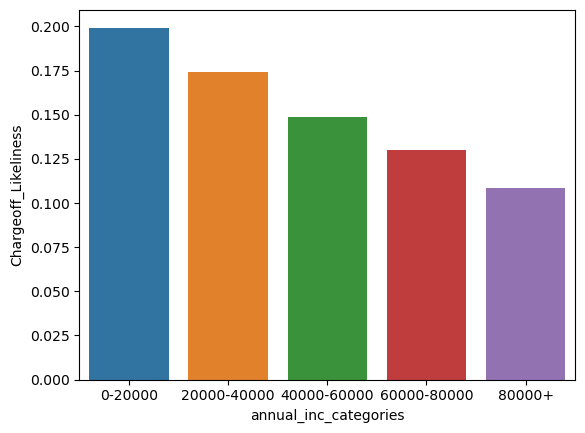

In [107]:
sns.barplot(x="annual_inc_categories", y="Chargeoff_Likeliness", data=annual_inc_against_chargeoff)

##### Observation

From above plot we can infer that the lower the annual income category is the higher the probability for charge off, so it is highly likely that a borrower with low income will default the loan

In [108]:
# Analysing Loan Amount categories against Chargeoff Likeliness

loan_amnt_against_chargeoff = loan_df.groupby(['loan_amnt_categories', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
loan_amnt_against_chargeoff["Total"] = loan_amnt_against_chargeoff["Fully Paid"] + loan_amnt_against_chargeoff["Charged Off"] + loan_amnt_against_chargeoff["Current"]
loan_amnt_against_chargeoff["Chargeoff_Likeliness"] = loan_amnt_against_chargeoff["Charged Off"] / loan_amnt_against_chargeoff["Total"]

<AxesSubplot:xlabel='loan_amnt_categories', ylabel='Chargeoff_Likeliness'>

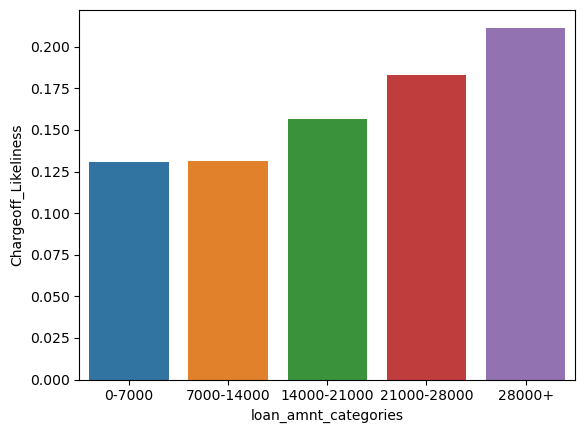

In [109]:
sns.barplot(x="loan_amnt_categories", y="Chargeoff_Likeliness", data=loan_amnt_against_chargeoff)

##### Observation

From the above plot we can infer that the higher the loan amount is the higher the probability of charge off, so it is highly likely that the loan will be defaulted if the loan amount is high

In [110]:
# Analysing Interest rate categories against Chargeoff Likeliness

int_rate_against_chargeoff = loan_df.groupby(['int_rate_categories', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
int_rate_against_chargeoff["Total"] = int_rate_against_chargeoff["Fully Paid"] + int_rate_against_chargeoff["Charged Off"] + int_rate_against_chargeoff["Current"]
int_rate_against_chargeoff["Chargeoff_Likeliness"] = int_rate_against_chargeoff["Charged Off"] / int_rate_against_chargeoff["Total"]

<AxesSubplot:xlabel='int_rate_categories', ylabel='Chargeoff_Likeliness'>

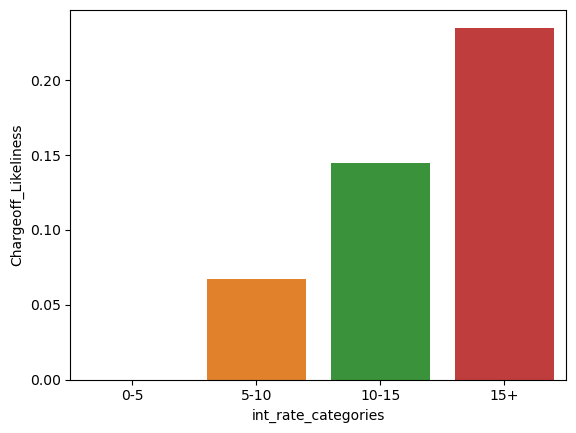

In [111]:
sns.barplot(x="int_rate_categories", y="Chargeoff_Likeliness", data=int_rate_against_chargeoff)

##### Observation

From the above plot we can infer that the higher the interest rate the higher the probability of charge off, so the borrower is highely likely to default if the interest rate is high

In [112]:
# Analysing Loan purpose against ChargeOff Likeliness

purpose_against_chargeoff = loan_df.groupby(['purpose', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
purpose_against_chargeoff["Total"] = purpose_against_chargeoff["Fully Paid"] + purpose_against_chargeoff["Charged Off"] + purpose_against_chargeoff["Current"]
purpose_against_chargeoff["Chargeoff_Likeliness"] = purpose_against_chargeoff["Charged Off"] / purpose_against_chargeoff["Total"]

<AxesSubplot:xlabel='purpose', ylabel='Chargeoff_Likeliness'>

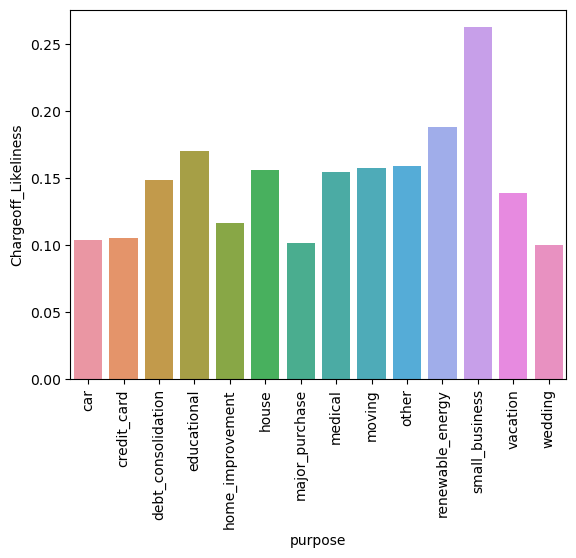

In [115]:
plt.xticks(rotation=90)
sns.barplot(x="purpose", y="Chargeoff_Likeliness", data=purpose_against_chargeoff)

##### Observation

From above plot we can infer that the probability of charge off is high if the purpose of loan is Small business, so if the borrowers borrow to a small business it is highly likely their loan will be defaulted

In [116]:
# Analysing Grade against ChargeOff Likeliness

grade_against_chargeoff = loan_df.groupby(['grade', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
grade_against_chargeoff["Total"] = grade_against_chargeoff["Fully Paid"] + grade_against_chargeoff["Charged Off"] + grade_against_chargeoff["Current"]
grade_against_chargeoff["Chargeoff_Likeliness"] = grade_against_chargeoff["Charged Off"] / grade_against_chargeoff["Total"]

<AxesSubplot:xlabel='grade', ylabel='Chargeoff_Likeliness'>

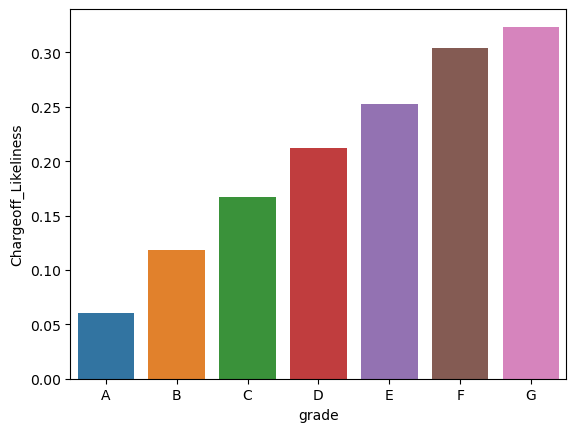

In [118]:
sns.barplot(x="grade", y="Chargeoff_Likeliness", data=grade_against_chargeoff)

##### Observation

From the above plot we can see that the probability of charge off increase as the grade moves from 'A' to 'G', so if the grade is 'G' it is highly likely that the loan will be defaulted

In [119]:
# Analysing Sub-Grade against ChargeOff Likeliness

sub_grade_against_chargeoff = loan_df.groupby(['sub_grade', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
sub_grade_against_chargeoff["Total"] = sub_grade_against_chargeoff["Fully Paid"] + sub_grade_against_chargeoff["Charged Off"] + sub_grade_against_chargeoff["Current"]
sub_grade_against_chargeoff["Chargeoff_Likeliness"] = sub_grade_against_chargeoff["Charged Off"] / sub_grade_against_chargeoff["Total"]

<AxesSubplot:xlabel='sub_grade', ylabel='Chargeoff_Likeliness'>

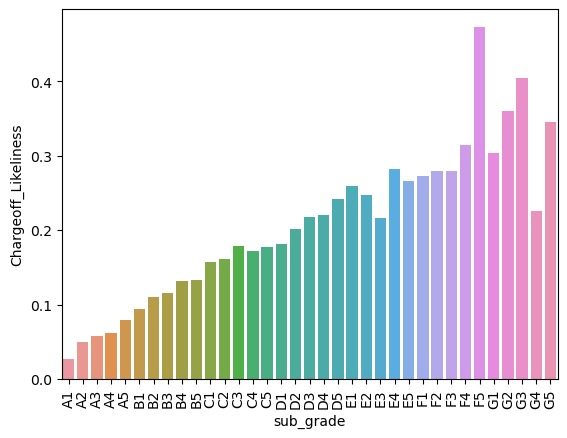

In [121]:
plt.xticks(rotation=90)
sns.barplot(x="sub_grade", y="Chargeoff_Likeliness", data=sub_grade_against_chargeoff)

##### Observation

From the above plot we can see that the probability of charge off increases with sub grade moving from 'A' to 'G' with few exception where F5 has highest probability

In [122]:
# Analysing Address State against ChargeOff Likeliness

addr_state_against_chargeoff = loan_df.groupby(['addr_state', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
addr_state_against_chargeoff["Total"] = addr_state_against_chargeoff["Fully Paid"] + addr_state_against_chargeoff["Charged Off"] + addr_state_against_chargeoff["Current"]
addr_state_against_chargeoff["Chargeoff_Likeliness"] = addr_state_against_chargeoff["Charged Off"] / addr_state_against_chargeoff["Total"]

<AxesSubplot:xlabel='addr_state', ylabel='Chargeoff_Likeliness'>

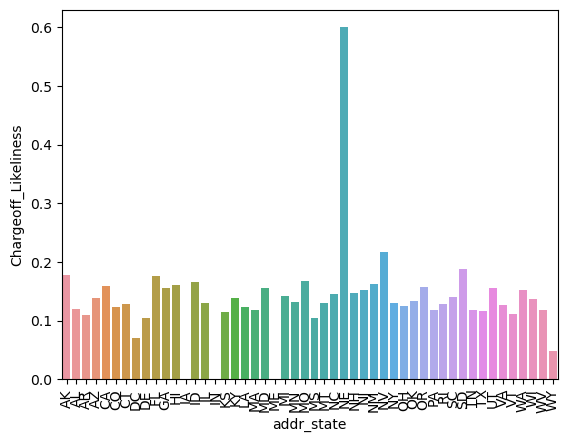

In [124]:
plt.xticks(rotation=90)
sns.barplot(x="addr_state", y="Chargeoff_Likeliness", data=addr_state_against_chargeoff)

##### Observation

From the above we can infer that if the address state is NE then there is highest chance that the loan will be defaulted followed by the states of NV, SD and FL have comparitvely higher chances of loan getting defaulted

In [125]:
# Analysing Employment Length against ChargeOff Likeliness

emp_length_against_chargeoff = loan_df.groupby(['emp_length', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
emp_length_against_chargeoff["Total"] = emp_length_against_chargeoff["Fully Paid"] + emp_length_against_chargeoff["Charged Off"] + emp_length_against_chargeoff["Current"]
emp_length_against_chargeoff["Chargeoff_Likeliness"] = emp_length_against_chargeoff["Charged Off"] / emp_length_against_chargeoff["Total"]

<AxesSubplot:xlabel='emp_length', ylabel='Chargeoff_Likeliness'>

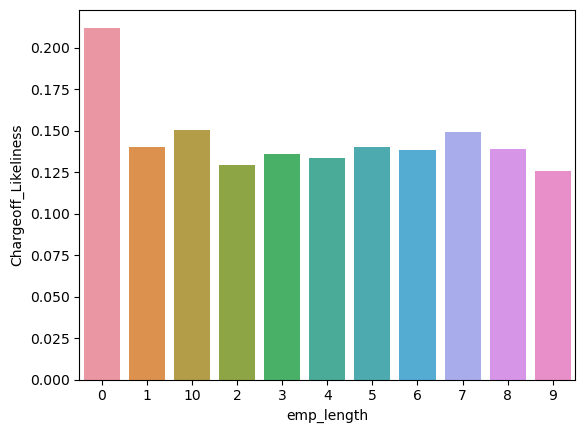

In [126]:
sns.barplot(x="emp_length", y="Chargeoff_Likeliness", data=emp_length_against_chargeoff)

##### Observation

From the above plot we can infer that if the employment length 0 then the probability of charge off is high, so if the borrower is newly employed or has less than a year of experience then there high chances of loan getting defaulted. 

In [130]:
# Analysing Public record against ChargeOff Likeliness

pub_rec_against_chargeoff = loan_df.groupby(['pub_rec', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
pub_rec_against_chargeoff["Total"] = pub_rec_against_chargeoff["Fully Paid"] + pub_rec_against_chargeoff["Charged Off"] + pub_rec_against_chargeoff["Current"]
pub_rec_against_chargeoff["Chargeoff_Likeliness"] = pub_rec_against_chargeoff["Charged Off"] / pub_rec_against_chargeoff["Total"]

<AxesSubplot:xlabel='pub_rec', ylabel='Chargeoff_Likeliness'>

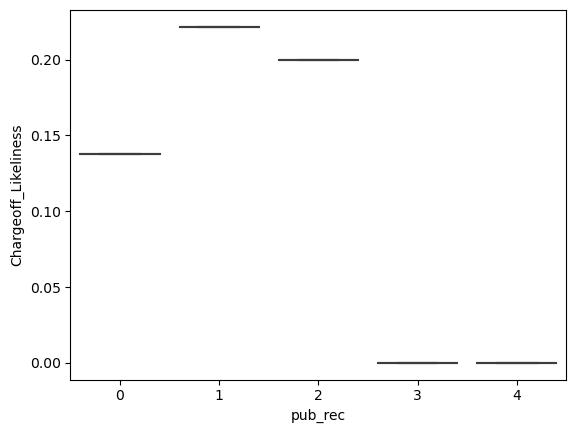

In [131]:
sns.boxplot(x="pub_rec", y="Chargeoff_Likeliness", data=pub_rec_against_chargeoff)

##### Observation

From the above plot we can see that if the public record value is 1 or 2 then the probability of charge off is higher, so if the public records has 1 or 2 values then it is highlt likely the loan will be defaulted 

In [132]:
# Analysing Public Bankruptcy record against ChargeOff Likeliness

pub_rec_bankruptcies_against_chargeoff = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status'])["loan_status"].count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_against_chargeoff["Total"] = pub_rec_bankruptcies_against_chargeoff["Fully Paid"] + pub_rec_bankruptcies_against_chargeoff["Charged Off"] + pub_rec_bankruptcies_against_chargeoff["Current"]
pub_rec_bankruptcies_against_chargeoff["Chargeoff_Likeliness"] = pub_rec_bankruptcies_against_chargeoff["Charged Off"] / pub_rec_bankruptcies_against_chargeoff["Total"]

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Chargeoff_Likeliness'>

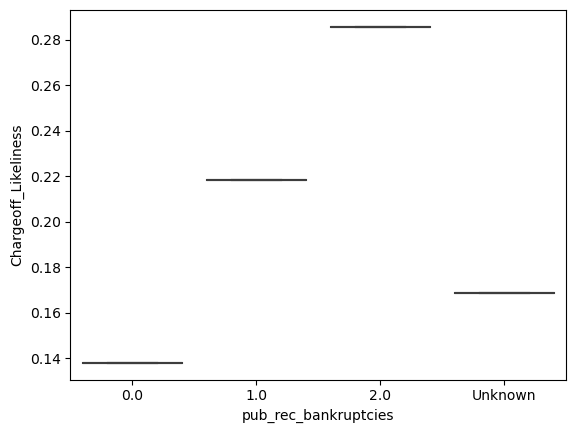

In [133]:
sns.boxplot(x="pub_rec_bankruptcies", y="Chargeoff_Likeliness", data=pub_rec_bankruptcies_against_chargeoff)

##### Observation

From above plot we can see that apart from the unknown values, if the public bankruptcies record increase the probability of chargeoff also increases, so if the more public bankruptcies record the more likely the loan gets defaulted

### Multivariate Analysis

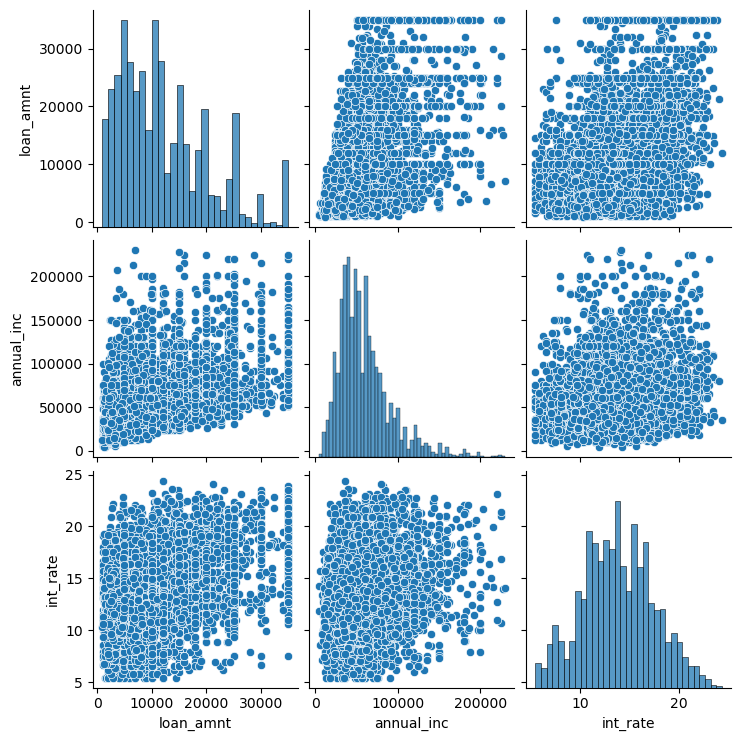

In [141]:
# Pair plot with few useful variables to draw insights

loan_charged_off_df = loan_df[loan_df["loan_status"] == "Charged Off"]
sns.pairplot(loan_charged_off_df[["loan_amnt", "annual_inc", "int_rate"]])